In [44]:
import pandas as pd
import numpy as np

# библиотека для построения графиков
import seaborn as sns
# библиотека с упрощенными графиками
import matplotlib.pyplot as plot

In [56]:
df = pd.read_csv("vgsales_10.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,14941,Stake: Fortune Fighters,XB,2003.0,Fighting,Metro 3D,0.02,0.01,0.00,0.00,0.02
1,9817,Street Hoops,GC,NaN,Sports,Unknown,0.09,0.02,0.00,0.00,0.12
2,9224,Wild ARMs XF,PSP,2007.0,Role-Playing,505 Games,0.07,0.00,0.06,0.01,0.14
3,15756,Memories Off: Yubikiri no Kikou,PSP,2011.0,Adventure,5pb,0.00,0.00,0.02,0.00,0.02
4,1398,Hannah Montana: Spotlight World Tour,Wii,2007.0,Action,Disney Interactive Studios,0.87,0.38,0.00,0.13,1.39
...,...,...,...,...,...,...,...,...,...,...,...
548,14766,Infinite Stratos 2: Ignition Hearts,PS3,2014.0,Adventure,5pb,0.00,0.00,0.03,0.00,0.03
549,9554,Backyard Baseball,GC,2003.0,Sports,Infogrames,0.10,0.03,0.00,0.00,0.13
550,2693,Driv3r,XB,2004.0,Racing,Atari,0.36,0.38,0.00,0.03,0.76
551,6026,Top Gear Overdrive,N64,1998.0,Racing,Kemco,0.23,0.06,0.00,0.00,0.29


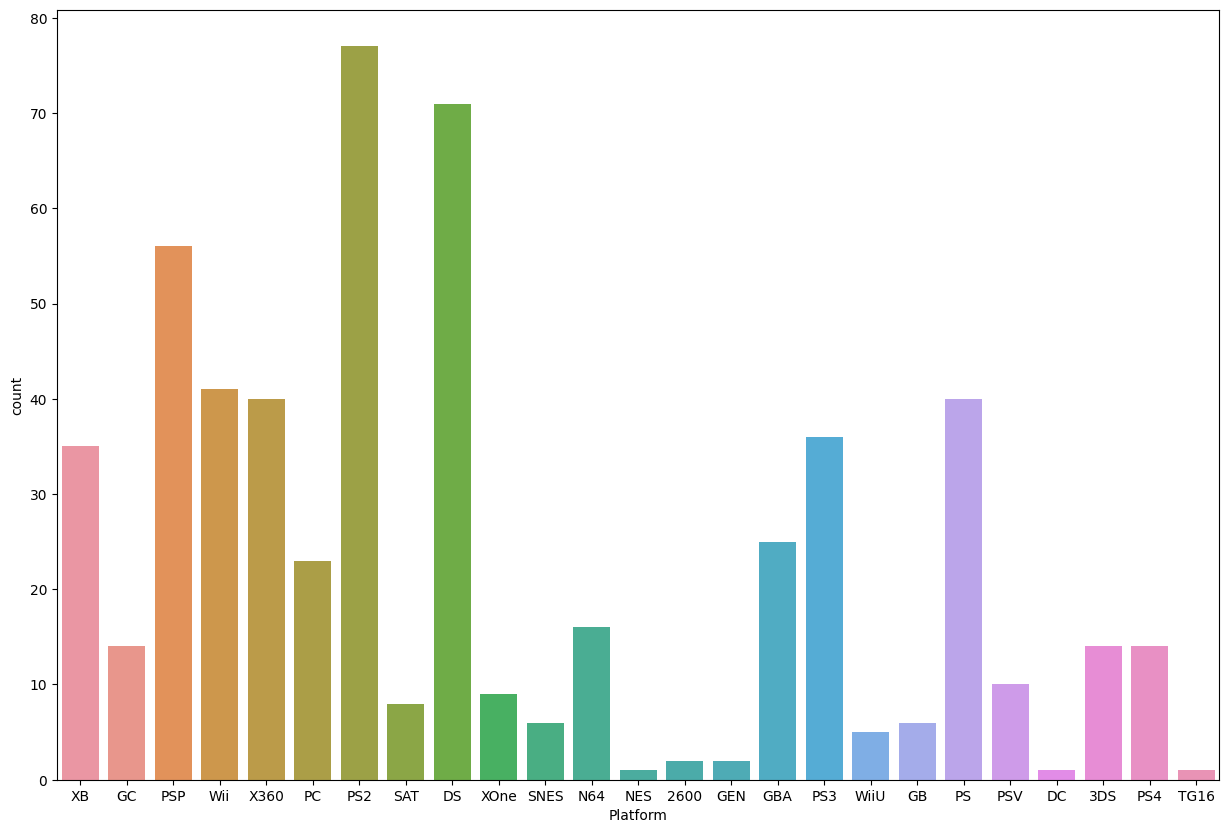

In [46]:
graph = sns.countplot(x="Platform", data = df)
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10)

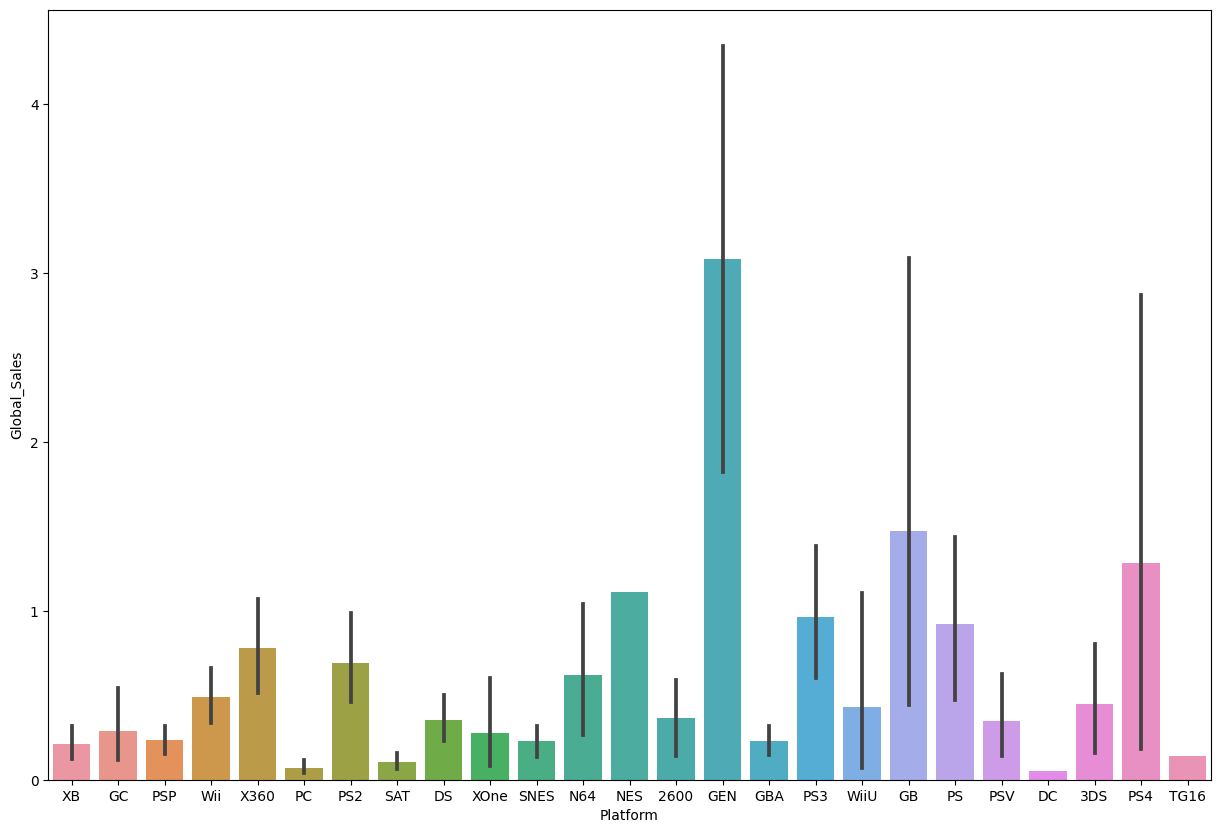

In [47]:
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10)

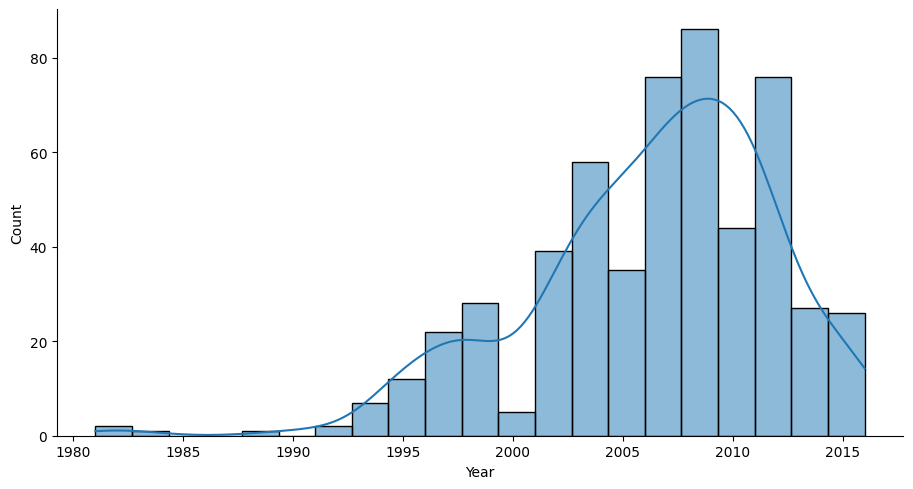

In [48]:
graph = sns.displot(df["Year"], kde = True) 
# kind = "kde", kind = True - аргумент, позволяющий построить отдельный график оценки плотности ядра или 
# kde рисуется в виде линии поверх гистограммы и часто повторяет форму её форму, 
# но дает больше информации о характере распределения.
graph.figure.set_figwidth(10)
graph.figure.set_figheight(5)

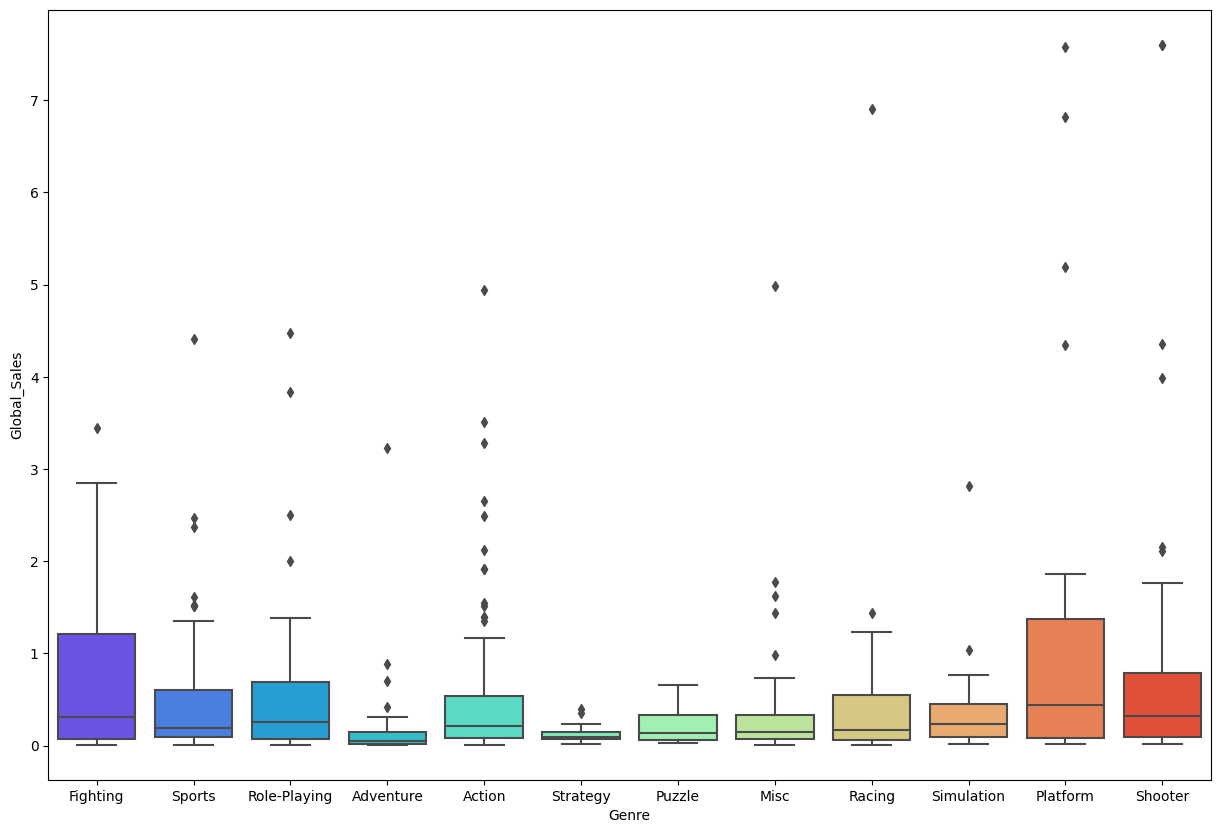

In [49]:
graph = sns.boxplot(x="Genre", y="Global_Sales",data = df,palette='rainbow')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

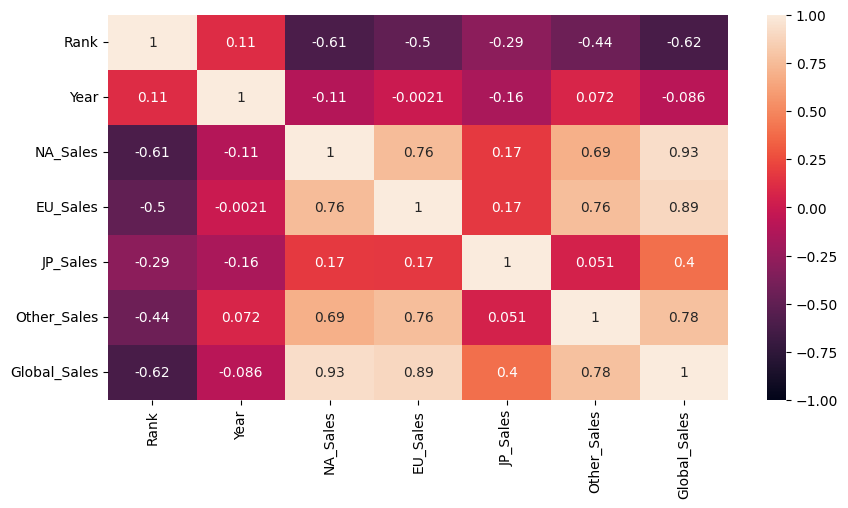

In [58]:
MyHeatMap = sns.heatmap(df[["Rank","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].corr(), vmin=-1, vmax=1, annot=True) #аргумент annot=True отображает коэффициент корреляции
MyHeatMap.figure.set_figwidth(10)
MyHeatMap.figure.set_figheight(5) 

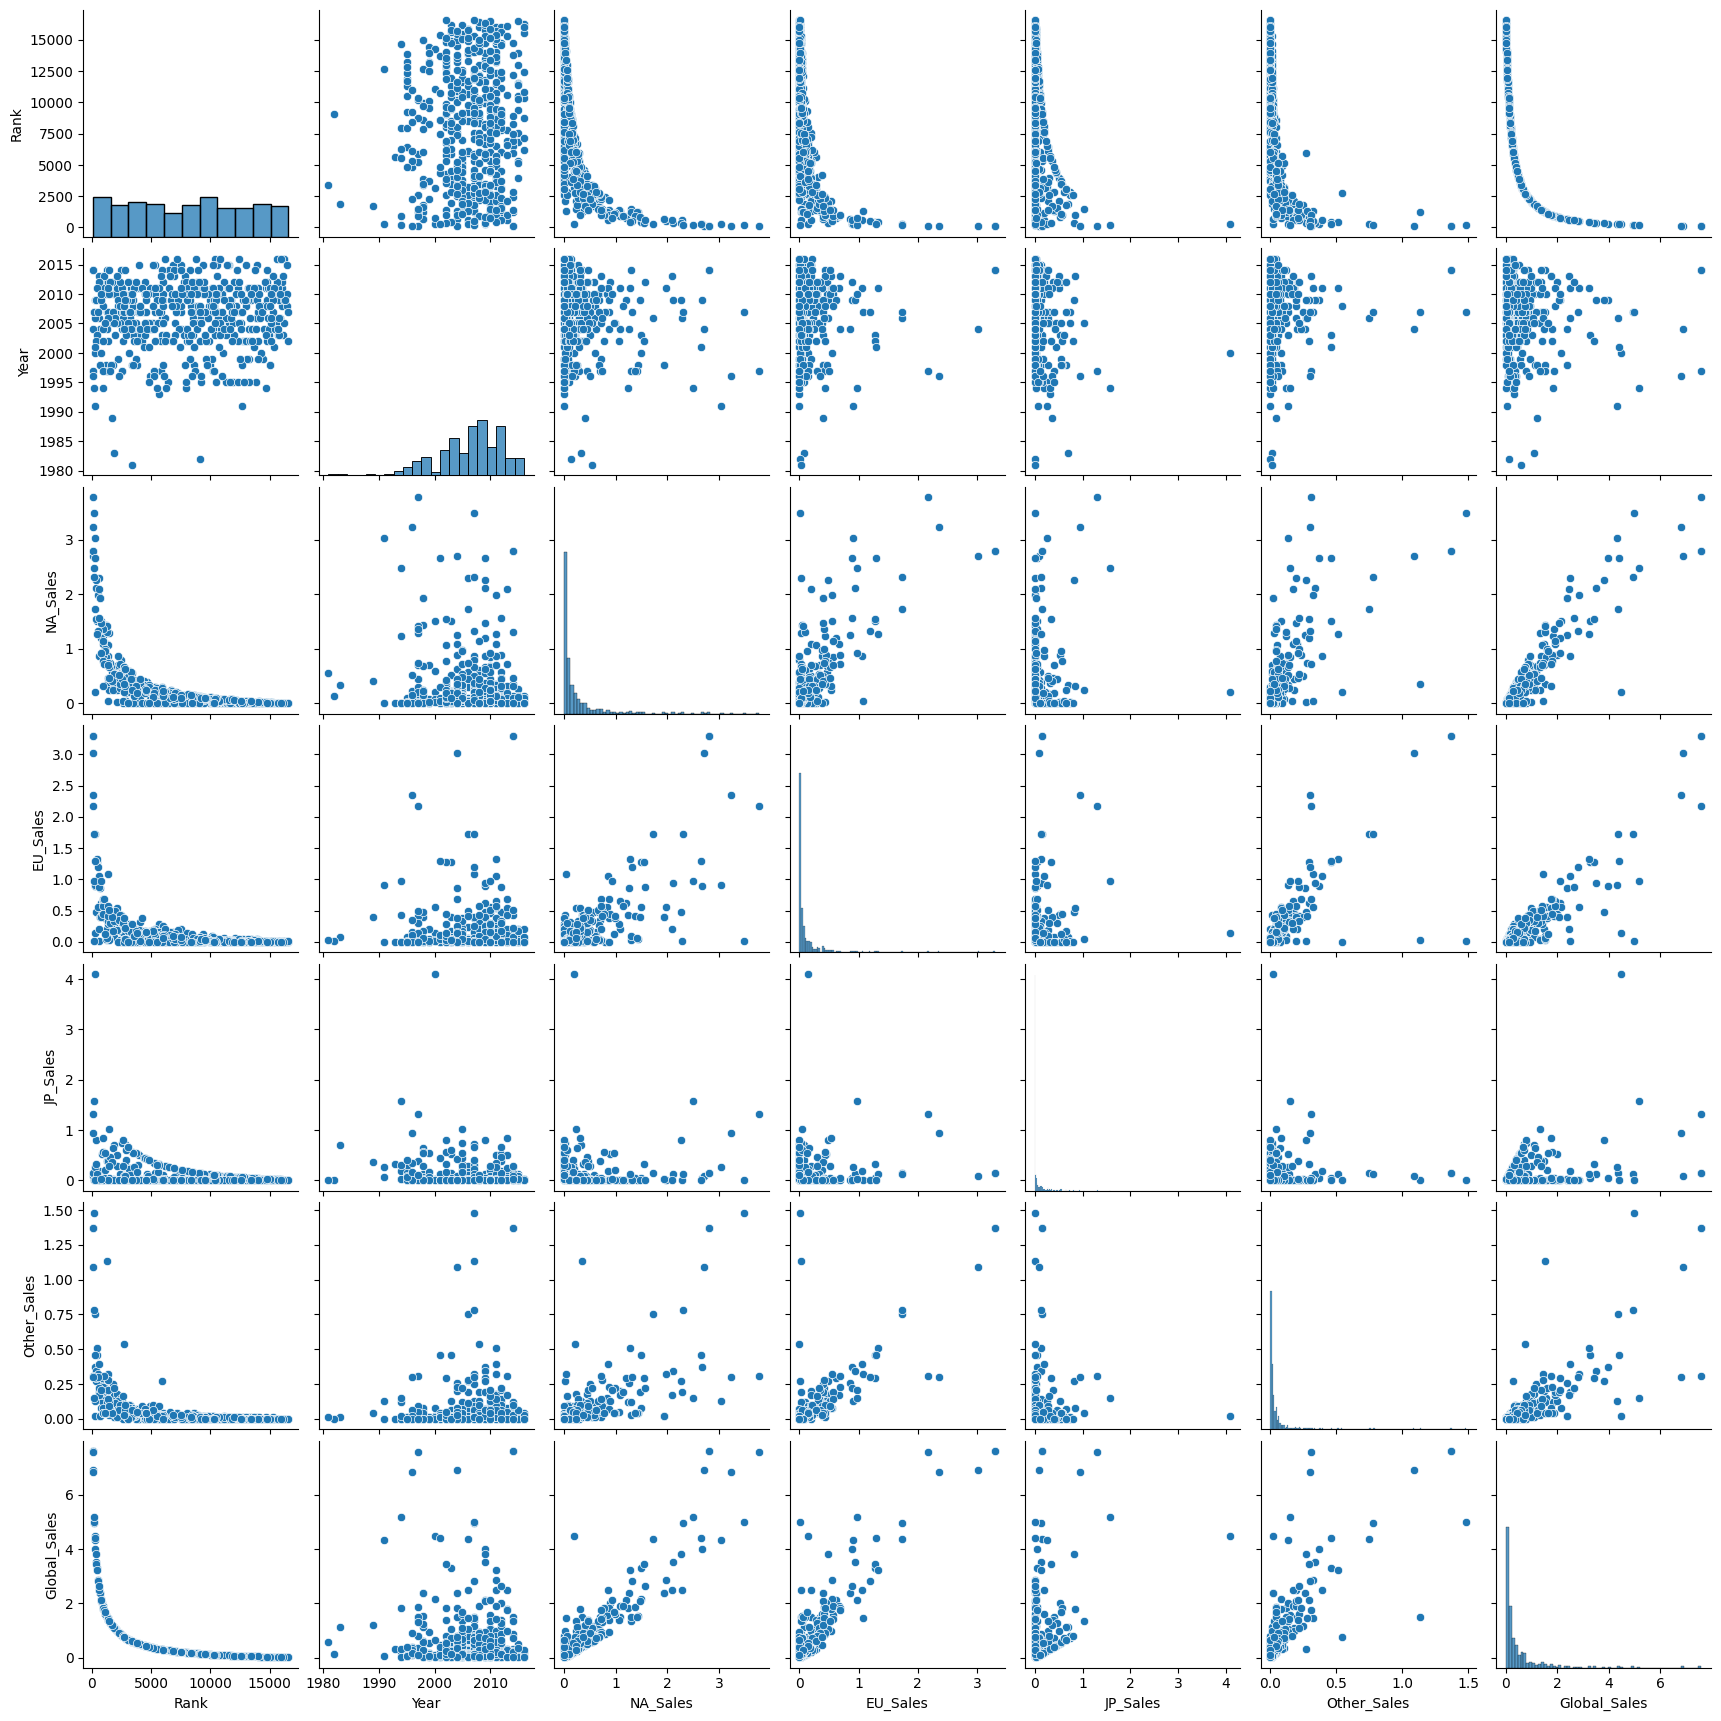

In [59]:
graph = sns.pairplot(df)

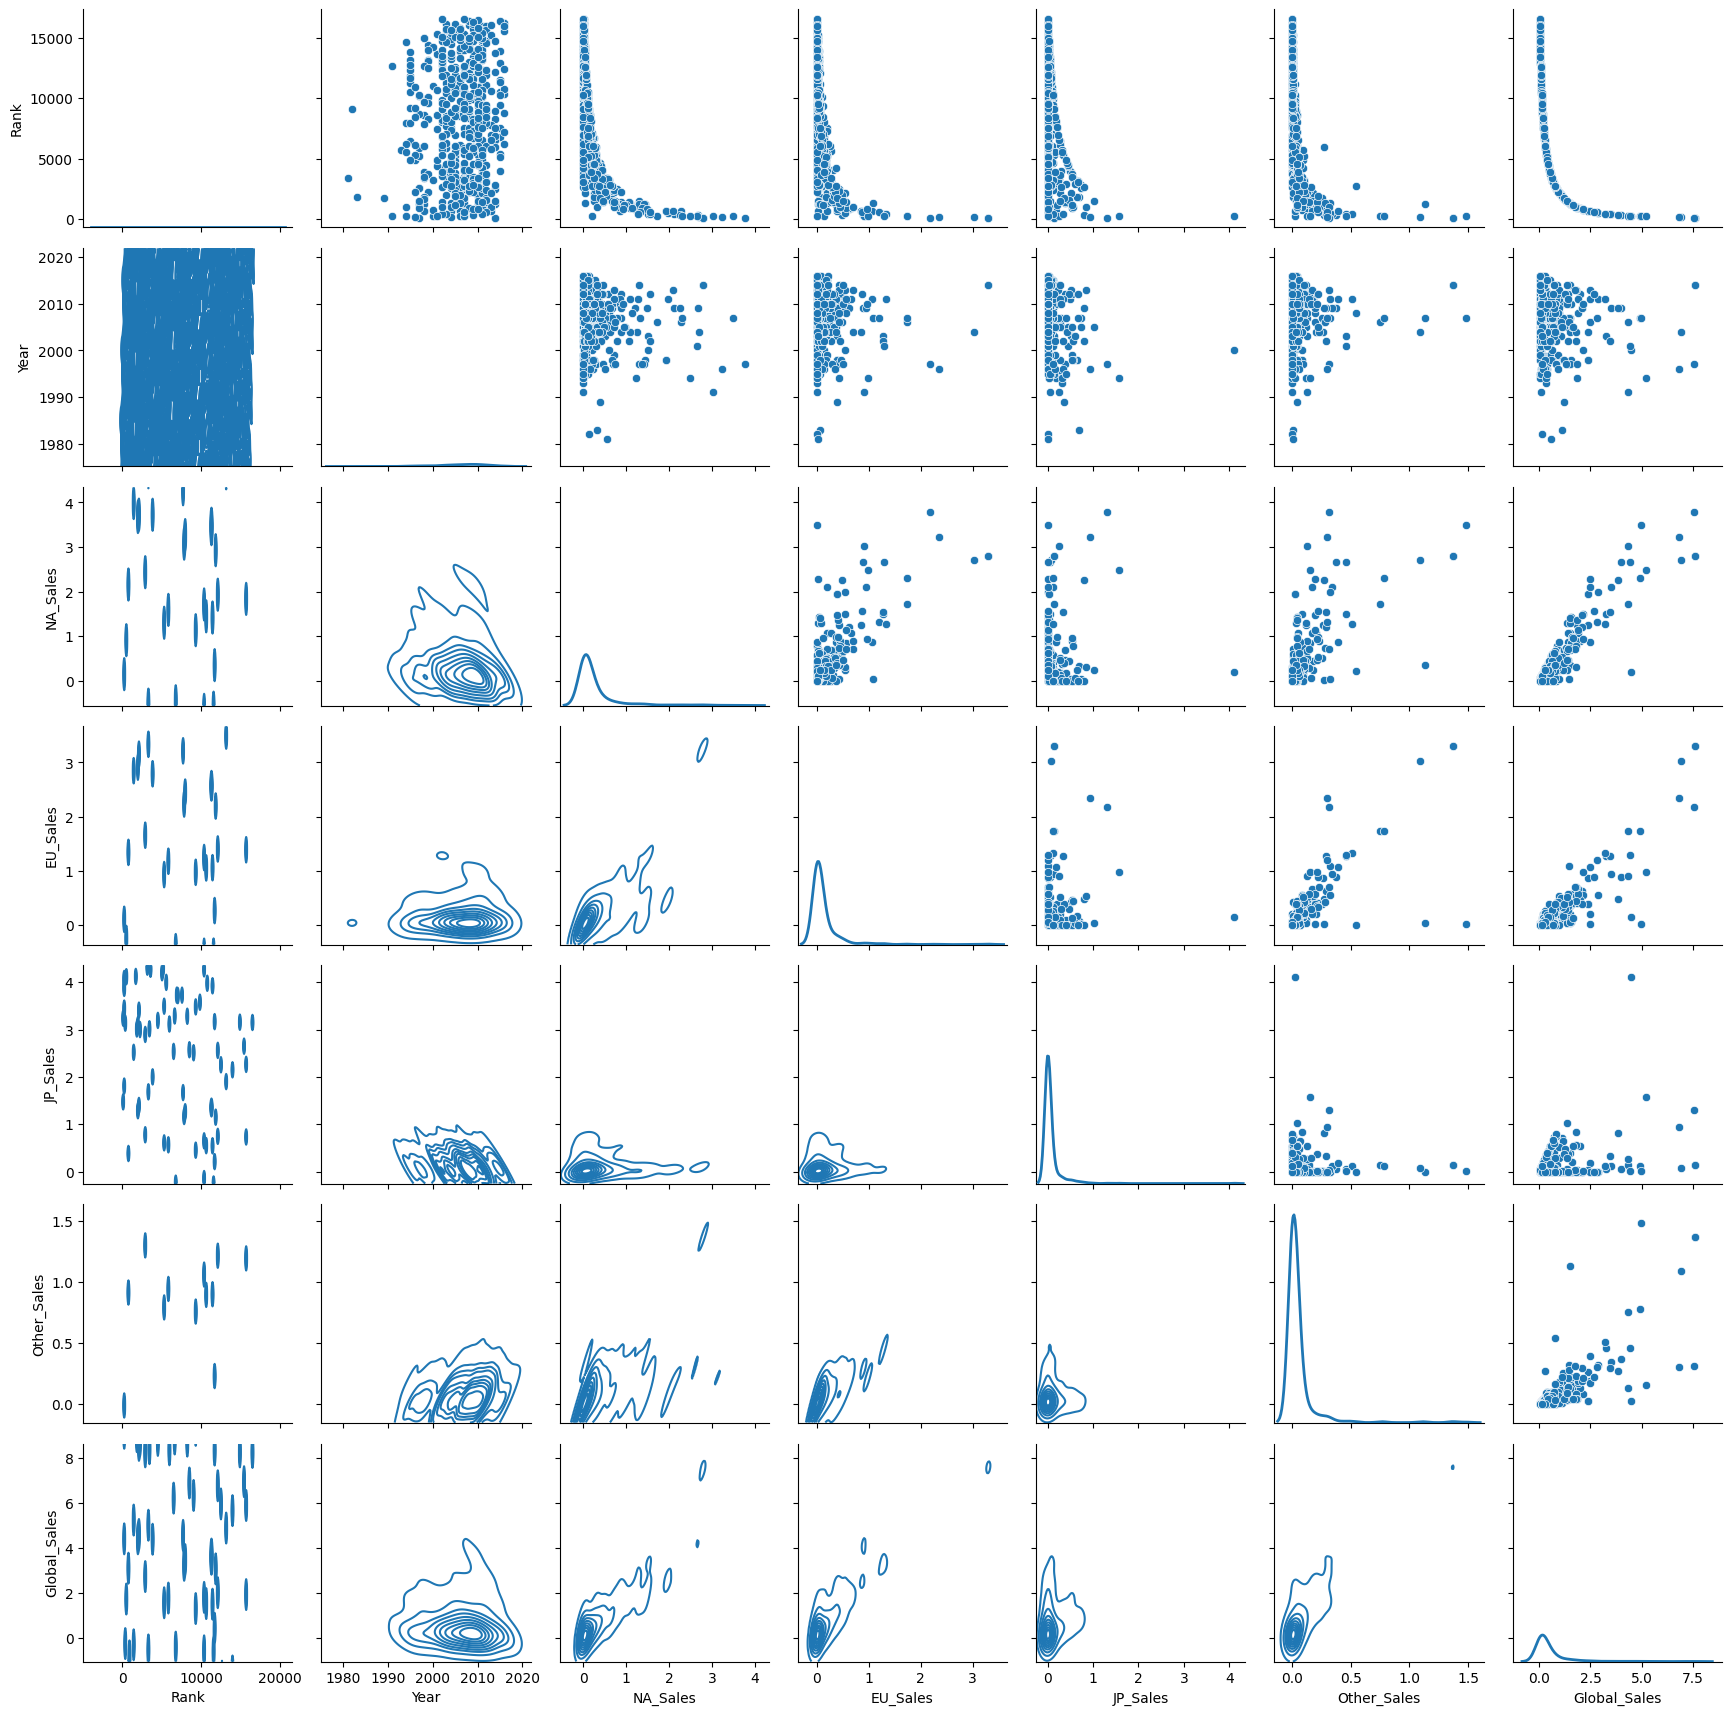

In [60]:
graph = sns.PairGrid(df)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)

In [61]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::50]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,0.02,0.01,0.00
50,0.00,0.00,0.52
100,0.42,0.21,0.08
150,0.00,0.00,0.02
200,0.58,0.04,0.11
250,0.50,0.19,0.28
300,0.07,0.00,0.00
350,0.56,0.00,0.00
400,0.06,0.01,0.00
450,0.00,0.00,0.13


In [63]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(df_mini)

all_predictions = model.predict(df_mini)

df_mini["KMeans"] = all_predictions

df_mini

C:\Users\Anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,JP_Sales,KMeans
0,0.02,0.01,0.00,0
50,0.00,0.00,0.52,2
100,0.42,0.21,0.08,1
150,0.00,0.00,0.02,0
200,0.58,0.04,0.11,1
250,0.50,0.19,0.28,1
300,0.07,0.00,0.00,0
350,0.56,0.00,0.00,1
400,0.06,0.01,0.00,0
450,0.00,0.00,0.13,0


<Axes: xlabel='count', ylabel='KMeans'>

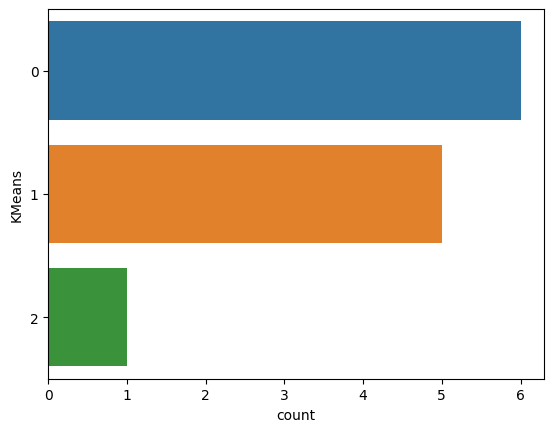

In [64]:
sns.countplot(data = df_mini, y = "KMeans")

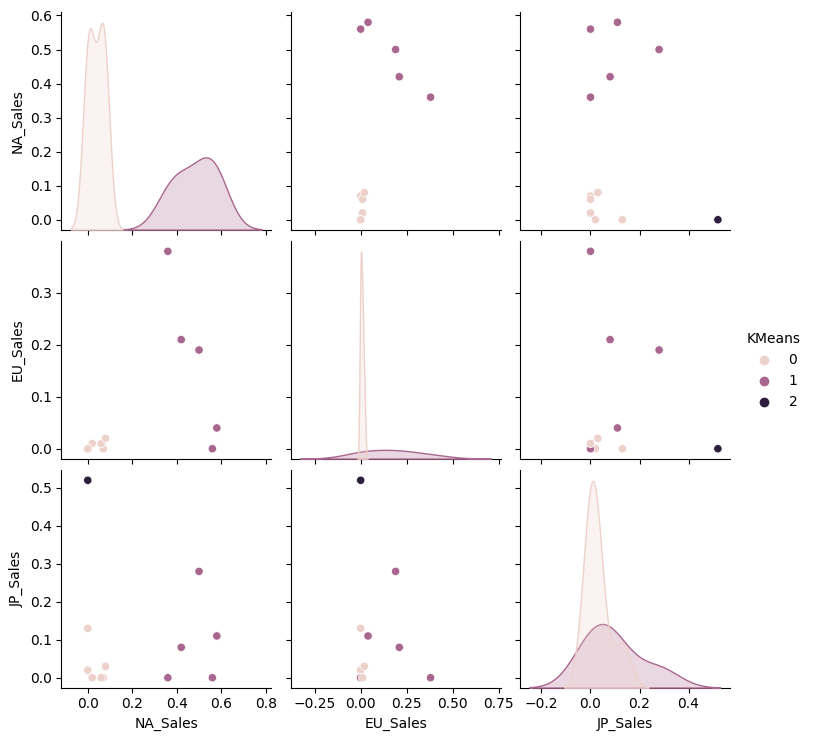

In [65]:
sns.pairplot(df_mini,hue="KMeans")

In [66]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::1]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,0.02,0.01,0.00
1,0.09,0.02,0.00
2,0.07,0.00,0.06
3,0.00,0.00,0.02
4,0.87,0.38,0.00
...,...,...,...
548,0.00,0.00,0.03
549,0.10,0.03,0.00
550,0.36,0.38,0.00
551,0.23,0.06,0.00


In [67]:
from sklearn.cluster import DBSCAN

model = DBSCAN()

model.fit(df_mini)

df_mini["DBSCAN"] = model.labels_

df_mini

,NA_Sales,EU_Sales,JP_Sales,DBSCAN
0,0.02,0.01,0.00,0
1,0.09,0.02,0.00,0
2,0.07,0.00,0.06,0
3,0.00,0.00,0.02,0
4,0.87,0.38,0.00,0
...,...,...,...,...
548,0.00,0.00,0.03,0
549,0.10,0.03,0.00,0
550,0.36,0.38,0.00,0
551,0.23,0.06,0.00,0


<Axes: xlabel='count', ylabel='DBSCAN'>

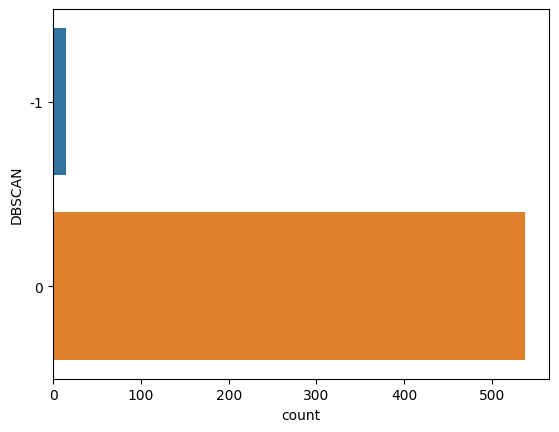

In [68]:
sns.countplot(data = df_mini, y = "DBSCAN")

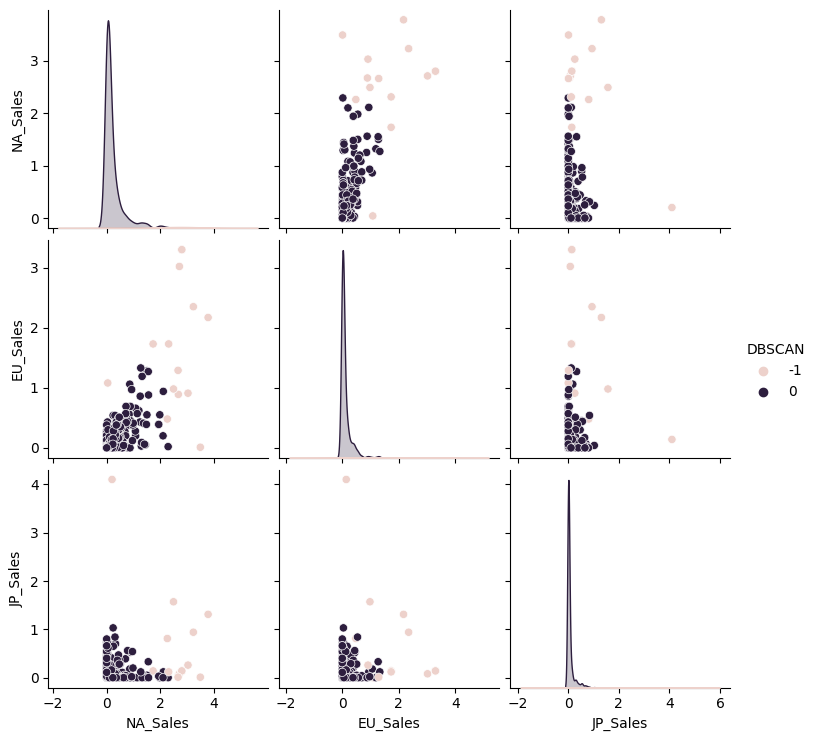

In [69]:
sns.pairplot(df_mini[::1],hue="DBSCAN")